### Employment Status of LA Out Migrators

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
file = pd.read_csv('ipums_clean.csv')

In [3]:
#Extracting annual counts of out migrators by employment status
counts = {}
for year in range(2006, 2018):
    stats = {}
    df = file[file.YEAR == year]
    stats['Employed'] = df.PERWT[df.EMPSTAT == 'Employed'].sum()
    stats['Unemployed'] = df.PERWT[df.EMPSTAT == 'Unemployed'].sum()
    stats['Not in Labor Force'] = df.PERWT[df.EMPSTAT == 'Not in labor force'].sum()
    counts[year] = stats    

In [4]:
#Creating data frame for plotting
status = pd.DataFrame(counts).reset_index()
status = status.rename({'index':'Status'}, axis=1)

employment = pd.DataFrame()
for year in range(2006, 2018):
    df = status.copy()
    df = df[[year, 'Status']]
    df['Year'] = np.full(len(df), year)
    df = df.rename({year:'Counts'}, axis=1)
    employment = pd.concat([employment, df], sort=True)
    
year = employment.Year.astype('str')    
employment.Year = pd.to_datetime(year)

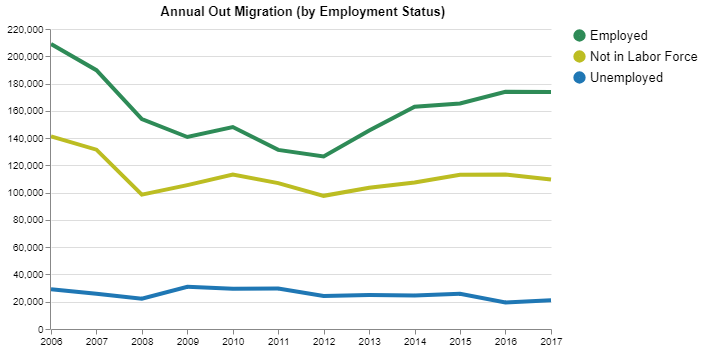

In [5]:
alt.Chart(employment).mark_line(strokeWidth=4).encode(
    x=alt.X('Year', 
            title=None, 
            axis=alt.Axis(grid=False, labelFlush=False)),
    y=alt.Y('Counts', 
            title=None, 
            axis=alt.Axis(offset=1)),
    color=alt.Color('Status', 
                    title=None, 
                    scale=alt.Scale(domain=['Employed', 'Not in Labor Force', 'Unemployed'], 
                                    range=['seagreen', '#bcbd22', '#1f77b4']))
).properties(width=500, 
             title='Annual Out Migration (by Employment Status)                            '
).configure_legend(labelFontSize=13, 
                   symbolStrokeWidth=6, 
                   symbolSize=40
).configure_view(strokeWidth=0)